<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Conv_Neural_Network_with_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass image classification

We have just been through a bunch of the following steps with a binary classification problem. Now we are going to step things up a notch with 10 classes of food (multiclass)

1. Become one with the data.
2. Preprocess the data (get it ready for model).
3. Create a model (start with baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting.
7. Repeat until satisfied

# Import and become one with the data

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2023-08-03 17:18:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  22.2MB/s    in 23s     

2023-08-03 17:18:42 (21.2 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [5]:
# Setup the train and test set directories
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
#Visualize our train images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir , target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder ) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print(f"image shape : {img.shape}")
  return img


['448484.jpg']
image shape : (512, 512, 3)


array([[[ 20,  20,  18],
        [ 18,  18,  16],
        [ 16,  16,  14],
        ...,
        [ 33,  30,  23],
        [ 32,  29,  22],
        [ 27,  24,  17]],

       [[ 20,  20,  18],
        [ 19,  19,  17],
        [ 19,  19,  17],
        ...,
        [ 33,  30,  23],
        [ 33,  30,  23],
        [ 31,  28,  21]],

       [[ 19,  19,  17],
        [ 20,  20,  18],
        [ 21,  21,  19],
        ...,
        [ 32,  29,  22],
        [ 33,  30,  23],
        [ 36,  33,  26]],

       ...,

       [[234, 243, 242],
        [234, 243, 242],
        [234, 243, 242],
        ...,
        [199, 198, 194],
        [201, 200, 196],
        [201, 200, 196]],

       [[235, 244, 243],
        [235, 244, 243],
        [235, 244, 243],
        ...,
        [201, 200, 196],
        [201, 200, 196],
        [198, 197, 193]],

       [[236, 245, 244],
        [235, 244, 243],
        [235, 244, 243],
        ...,
        [206, 205, 201],
        [205, 204, 200],
        [201, 200, 196]]

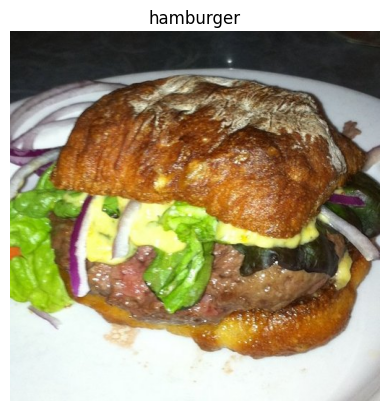

In [13]:
view_random_image(target_dir = "/content/10_food_classes_all_data/train/" , target_class = "hamburger")

# All process:

1. Load our images.
2. Preprocess our images.
3. Build a CNN.
4. Compile a CNN.
5. Fit the CNN

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

train_datagen = ImageDataGenerator(rescale = 1./255 ,
                                   rotation_range = 0.2 ,
                                   width_shift_range = 0.2 ,
                                   height_shift_range = 0.2 ,
                                   shear_range = 0.2 ,
                                   zoom_range = 0.2 ,
                                   horizontal_flip = True ,
                                       )
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir ,
                                               target_size = (224,224) ,
                                               batch_size = 32 ,
                                               class_mode = "categorical"
                                               )

test_data = test_datagen.flow_from_directory( directory = test_dir ,
                                             target_size = (224,224) ,
                                              batch_size = 32 ,
                                              class_mode = "categorical"
                                              )



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [20]:
tf.random.set_seed(42)

cnn = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 64 ,
                            activation = "relu" ,
                            input_shape = (224,224,3) ,
                            kernel_size = 3
                            )   ,
     tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(10 , activation = "softmax")
    ]

)
cnn.compile(loss = ["categorical_crossentropy"] ,
            optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1) ,
            metrics = ["accuracy"]
            )

hist = cnn.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
 99/235 [===========>..................] - ETA: 1:09 - loss: 731217536.0000 - accuracy: 0.1010

KeyboardInterrupt: ignored